# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 2 Data

In [2]:
df= pd.read_csv("Metabolic Syndrome.csv")
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


## 2.1 Brief Explanation of the Data:

Column Descriptors:

seqn: Sequential identification number.

Age: Age of the individual.

Sex: Gender of the individual (e.g., Male, Female).

Marital: Marital status of the individual.

Income: Income level or income-related information.

Race: Ethnic or racial background of the individual.

WaistCirc: Waist circumference measurement.

BMI: Body Mass Index, a measure of body composition.

Albuminuria: Measurement related to albumin in urine.

UrAlbCr: Urinary albumin-to-creatinine ratio.

UricAcid: Uric acid levels in the blood.

BloodGlucose: Blood glucose levels, an indicator of diabetes risk.

HDL: High-Density Lipoprotein cholesterol levels (the "good" cholesterol).

Triglycerides: Triglyceride levels in the blood.

MetabolicSyndrome: Binary variable indicating the presence (1) or absence (0) of metabolic syndrome.


# 3. EDA 

In [3]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28

In [4]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [5]:
df.shape

(2401, 15)

In [6]:
print("Columns:")
print(df.columns)

Columns:
Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')


In [7]:
print("Unique Values:")
print(df.nunique())

Unique Values:
seqn                 2401
Age                    61
Sex                     2
Marital                 5
Income                 14
Race                    6
WaistCirc             635
BMI                   322
Albuminuria             3
UrAlbCr              1383
UricAcid               88
BloodGlucose          187
HDL                    93
Triglycerides         345
MetabolicSyndrome       2
dtype: int64


In [8]:
df.isnull().sum() 

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [9]:
df["Income"].fillna(df["Income"].median(),inplace=True)
df["WaistCirc"].fillna(df["WaistCirc"].median(),inplace=True)
df["BMI"].fillna(df["BMI"].median(),inplace=True)

In [10]:
df.isnull().sum() 

seqn                   0
Age                    0
Sex                    0
Marital              208
Income                 0
Race                   0
WaistCirc              0
BMI                    0
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [11]:
del df["seqn"]

# 3.1 Categorical Data Distribution

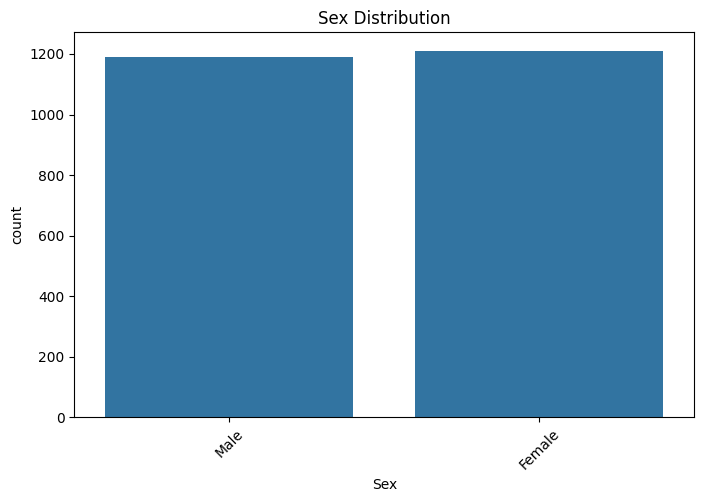

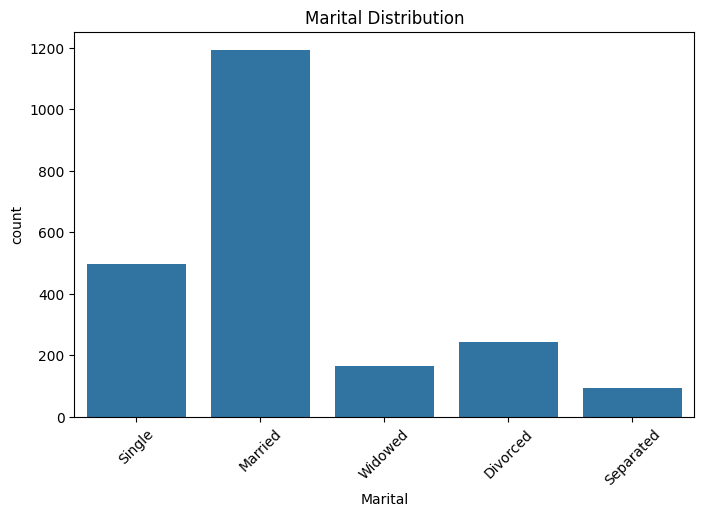

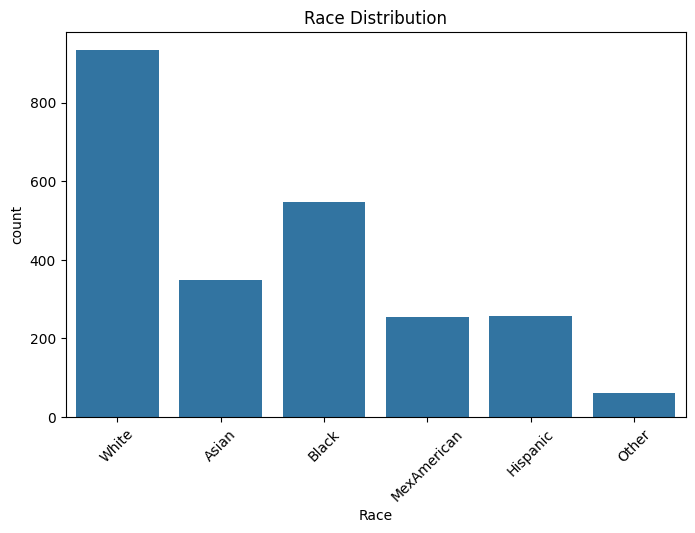

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()


In [13]:
categorical_columns

,Sex,Marital,Race
0,Male,Single,White
1,Female,Married,White
2,Male,Single,Asian
3,Female,Single,Black
4,Male,Married,Asian
...,...,...,...
2396,Female,Married,Other
2397,Female,Single,Asian
2398,Male,Single,MexAmerican
2399,Male,Married,MexAmerican


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [15]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,3,8200.0,5,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,0,1,4500.0,5,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,1,3,800.0,0,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,0,3,2000.0,1,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,1,1,2500.0,0,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,0,1,1000.0,4,97.0,59.7,0,22.11,5.8,152,57,107,0
2397,30,0,3,2000.0,0,97.0,18.0,0,2.90,7.9,91,90,91,0
2398,28,1,3,800.0,3,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,27,1,1,8200.0,3,106.6,31.3,0,4.15,6.2,100,41,124,1


# 3.2 Data Distribution

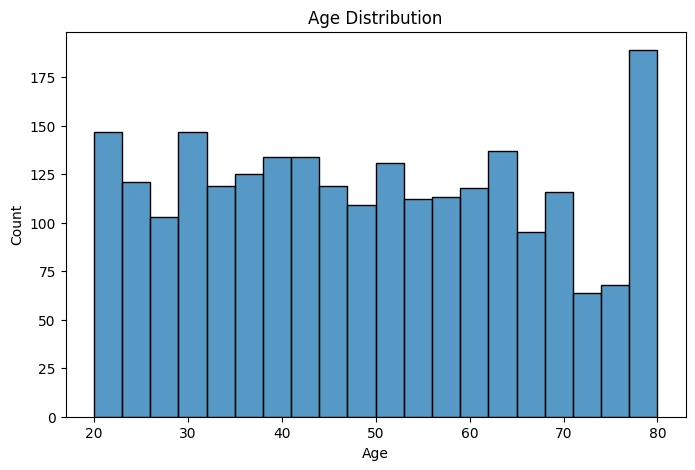

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20)
plt.title("Age Distribution")
plt.show()

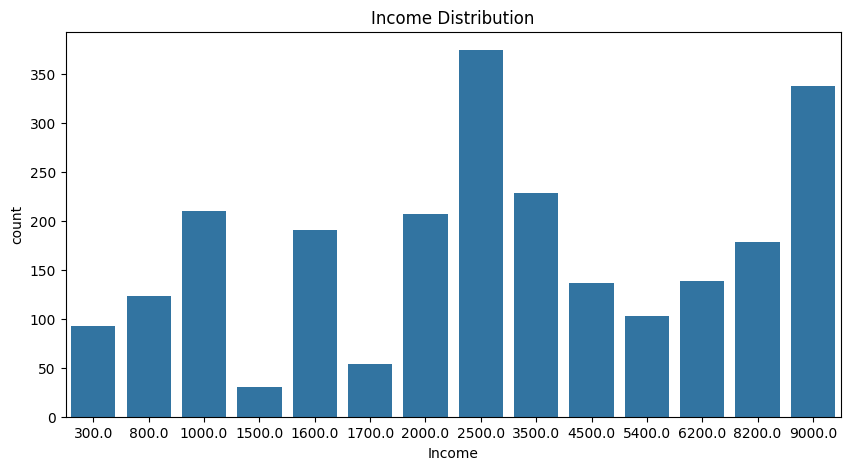

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Income')
plt.title("Income Distribution")
plt.show()

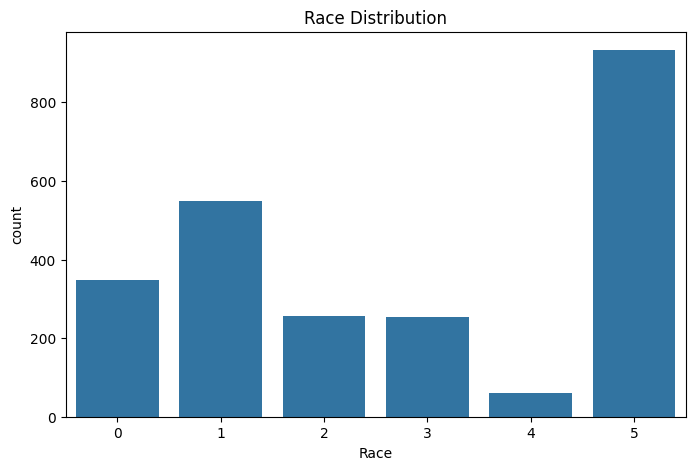

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Race')
plt.title("Race Distribution")
plt.show()

# 3.3. Correlation Analysis

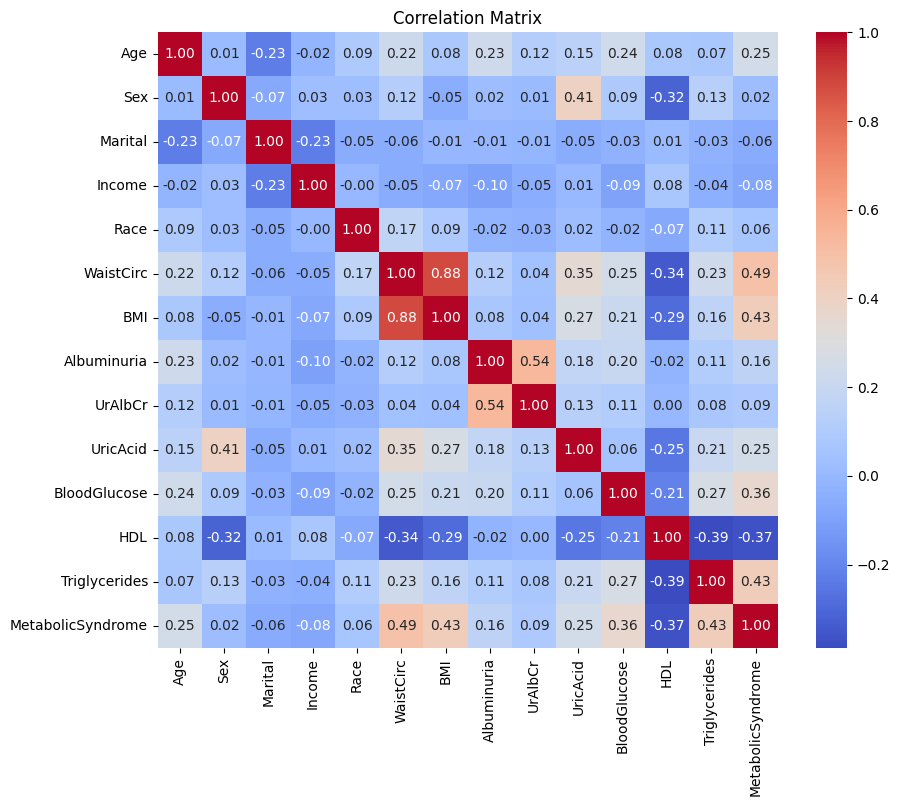

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [20]:
df.shape

(2401, 14)

In [21]:
df.columns

Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [22]:
df.describe()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,0.495627,1.907539,3931.903374,2.802999,98.260975,28.691337,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,17.632852,0.500085,1.468201,2899.305678,1.967424,15.964061,6.626869,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,20.000000,0.000000,0.000000,300.000000,0.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,34.000000,0.000000,1.000000,1600.000000,1.000000,87.000000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,48.000000,0.000000,1.000000,2500.000000,3.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,63.000000,1.000000,3.000000,6200.000000,5.000000,107.200000,32.000000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,80.000000,1.000000,5.000000,9000.000000,5.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   int64  
 2   Marital            2401 non-null   int64  
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   int64  
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 262.7 KB


In [24]:
df.nunique()

Age                    61
Sex                     2
Marital                 6
Income                 14
Race                    6
WaistCirc             635
BMI                   322
Albuminuria             3
UrAlbCr              1383
UricAcid               88
BloodGlucose          187
HDL                    93
Triglycerides         345
MetabolicSyndrome       2
dtype: int64

# 4.Data Splitting

In [25]:
x = df.drop(['MetabolicSyndrome'], axis=1)
y = df['MetabolicSyndrome']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 5. Basic Data Visualization

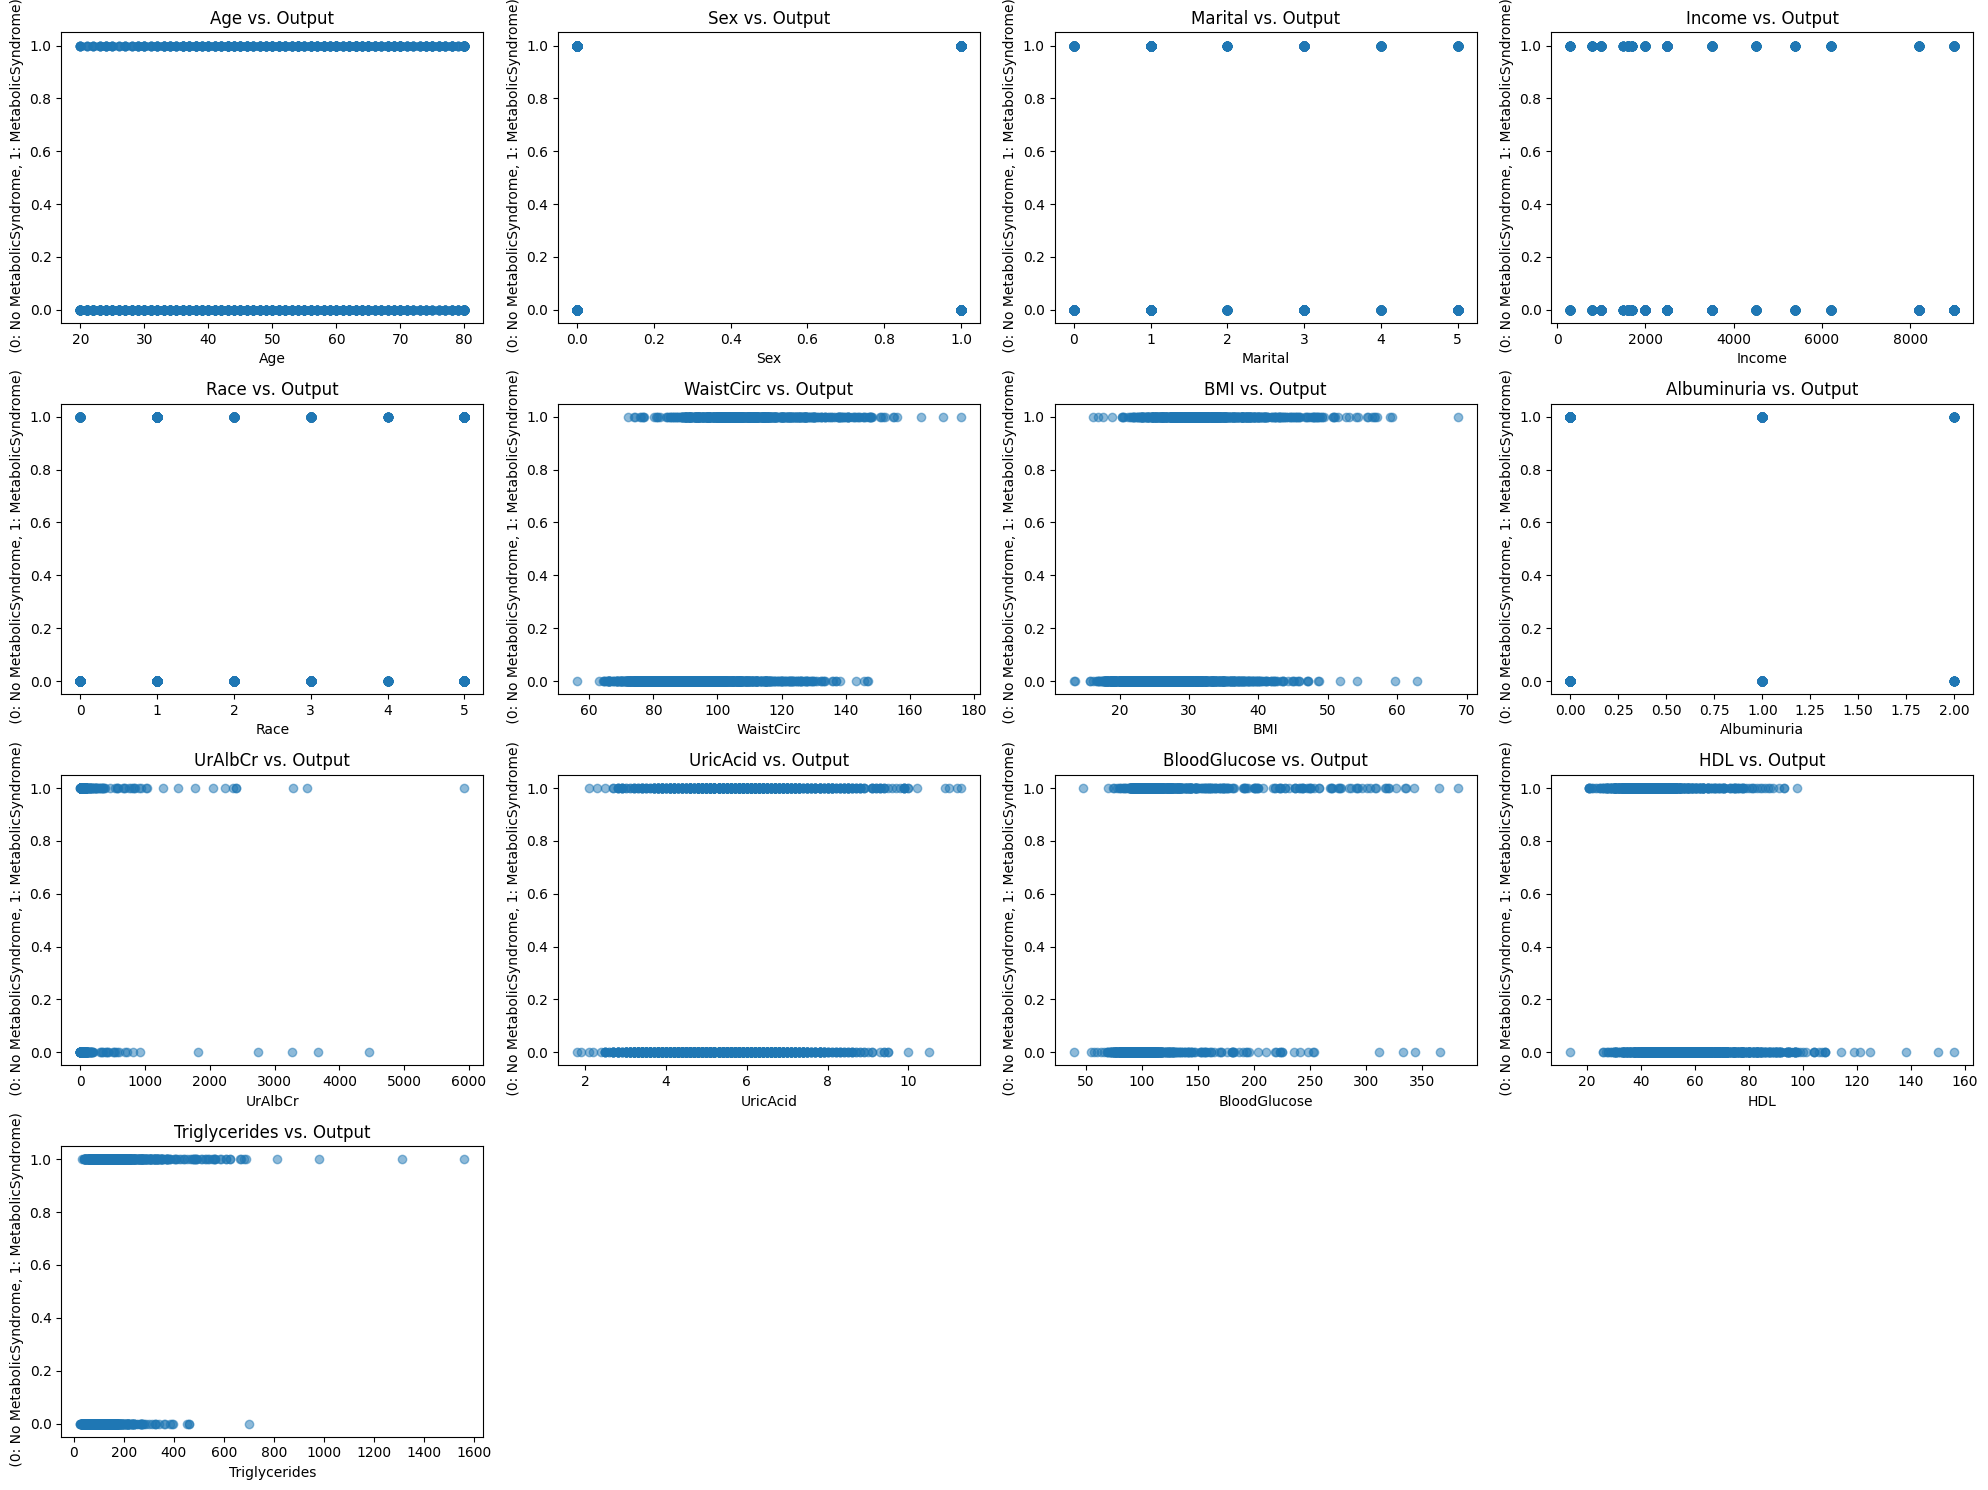

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))

for i, column in enumerate(x.columns):
    plt.subplot(4, 4, i + 1)  # Assuming 4x4 grid, adjust as needed
    plt.scatter(x[column], df['MetabolicSyndrome'], alpha=0.5)
    plt.title(f'{column} vs. Output')
    plt.xlabel(column)
    plt.ylabel(' (0: No MetabolicSyndrome, 1: MetabolicSyndrome)')
plt.tight_layout()
plt.show()


# 6. StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 7.1 support vector machine Model Training and Evaluation

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", confusion_svm)
print("Classification Report:\n", classification_rep_svm)


Support Vector Machine (SVM) Model:
Accuracy: 0.82
Confusion Matrix:
 [[285  39]
 [ 47 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       324
           1       0.74      0.70      0.72       157

    accuracy                           0.82       481
   macro avg       0.80      0.79      0.79       481
weighted avg       0.82      0.82      0.82       481



# 7.2 LogisticRegression Model Training and Evaluation

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Confusion Matrix:\n", confusion_logistic)
print("Classification Report:\n", classification_rep_logistic)


Logistic Regression Model:
Accuracy: 0.83
Confusion Matrix:
 [[296  28]
 [ 56 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       324
           1       0.78      0.64      0.71       157

    accuracy                           0.83       481
   macro avg       0.81      0.78      0.79       481
weighted avg       0.82      0.83      0.82       481



# 7.3 DecisionTreeClassifier Model Training and Evaluation

In [31]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_rep_decision_tree = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print("Confusion Matrix:\n", confusion_decision_tree)
print("Classification Report:\n", classification_rep_decision_tree)

Decision Tree Model:
Accuracy: 0.85
Confusion Matrix:
 [[293  31]
 [ 42 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       324
           1       0.79      0.73      0.76       157

    accuracy                           0.85       481
   macro avg       0.83      0.82      0.82       481
weighted avg       0.85      0.85      0.85       481



# 7.4 RandomForestClassifier Model Training and Evaluation

In [32]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)
classification_rep_random_forest = classification_report(y_test, y_pred_random_forest)

print("Random Forest Model:")
print(f"Accuracy: {accuracy_random_forest:.2f}")
print("Confusion Matrix:\n", confusion_random_forest)
print("Classification Report:\n", classification_rep_random_forest)


Random Forest Model:
Accuracy: 0.87
Confusion Matrix:
 [[302  22]
 [ 40 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       324
           1       0.84      0.75      0.79       157

    accuracy                           0.87       481
   macro avg       0.86      0.84      0.85       481
weighted avg       0.87      0.87      0.87       481



# 8. Saving The Model

In [33]:
import joblib
joblib.dump(random_forest_model, 'Metabolic Syndrome')

['Metabolic Syndrome']